<img src="../strathclyde_banner.png" alt="University of Strathclyde" width="50%" align="left">

# 4. Complex Representation of QAM <a class="anchor" id="complex_QAM"></a>

The QAM model we have looked at so far has used two real signals as the input, however a complex representation is also possible. This model is functionally identical to the previous model, however it is simpler to implement as only a single mixer is required.

## Table of Contents

* [4. Complex Representation of QAM](04_complex_QAM.ipynb)
    * [4.1 Complex Modulation](#complex_QAM_mod)
    * [4.2 Complex Demodulation](#complex_QAM_demod)
    * [4.3 Conclusion](#conclusion)

**Import Libraries**

For this notebook we will be using NumPy for computation and MatplotLib for visualisation of our waveforms as well as pystrath_sdr helper functions for plots.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 4.1 Complex Modulation <a class="anchor" id="complex_QAM_mod"></a>

Consider a complex baseband notation, shown as [Figure 1](#fig-1):

<a class="anchor" id="fig-1"></a>
<figure>
<img src='./images/Complex_Mod.png' height='30%' width='30%'/>
    <figcaption><b>Figure 1: Complex Modulation</b></figcaption>
</figure>

where:

$g(t) = g_{1}(t) + jg_{2}(t)$

and $g_{1}$ and $g_{2}$ are the same signals used in the QAM modulation example.

$g_{1}(t) = A_{1} \cos(2 \pi f_{b1} t)$

$g_{2}(t) = A_{2} \cos(2 \pi f_{b2} t)$

First we define the two information signals, as seen in the previous notebook.

In [2]:
# Set basic params
fs = 4096e6 # sample rate
fb = 64e6 # frequency of baseband signal
fb2 = 32e6 # frequency of second baseband signal
A1 = 2 # baseband signal amplitude
A2 = 1 # second baseband signal amplitude
N_fft = 2048 # fft size

t = np.arange(N_fft)/fs #time scale

In [3]:
# Define two information signals
g1 = A1*np.cos(2*np.pi*fb*t)
g2 = A2*np.cos(2*np.pi*fb2*t)

We now define the complex signal g(t) by summing together $g_{1}(t)$ and a complex signal, $g_{2}(t)$.

In [4]:
# Define complex input signal using real g1(t) and imag. g2(t)
g_complex = g1 + 1j*(g2)

In [5]:
# Calculate FFT
g_complex_fft_result = np.fft.fft(g1, N_fft)

# Get the corresponding frequencies, that depend on N_fft and Fs - freq. domain x axis
freqs = np.fft.fftfreq(N_fft,1/fs)

If we plot this complex information signal as before, we can observe that in the time domain the information signal matches $g_{1}$ and $g_{2}$ previously shown in the QAM example. 

We show here the baseband signals as both a one sided and two sided frequency plot. Up to now in this series of notebooks we have only explored one sided plots, as our signals have been real, and therefore symetrical in positive and negative frequencies. In this notebook we will be exploring complex signals and as such information will be contained in positive and negative frequencies.

For this plot however, it was worth noting the symmetry that exists in the signal.  

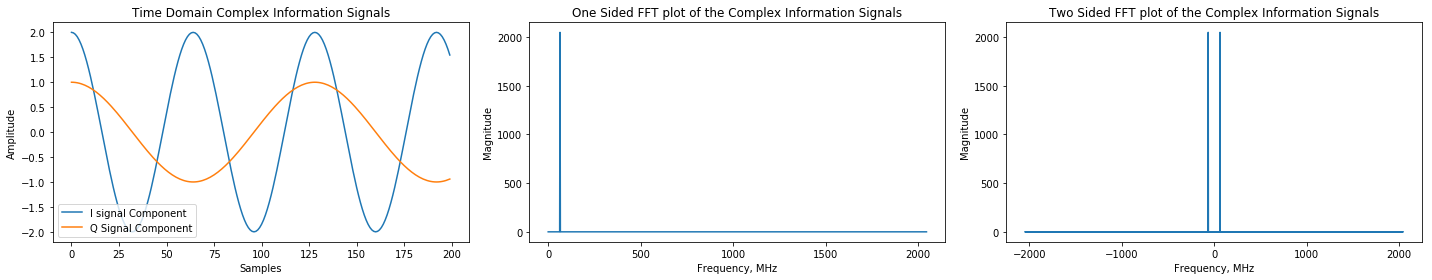

In [6]:
fig, axs = plt.subplots(1,3, figsize=(20,4))
axs[0].plot(g_complex.real[:200])
axs[0].plot(g_complex.imag[:200])
axs[0].set_title('Time Domain Complex Information Signals')
axs[0].set_xlabel('Samples')
axs[0].set_ylabel('Amplitude')
axs[0].legend(('I signal Component', 'Q Signal Component'))

axs[1].plot(freqs[:int(N_fft/2)]/1e6, np.abs(g_complex_fft_result[:int(N_fft/2)]))
axs[1].set_title('One Sided FFT plot of the Complex Information Signals')
axs[1].set_ylabel('Magnitude')
axs[1].set_xlabel('Frequency, MHz')
fig.tight_layout()

axs[2].plot(freqs[:int(N_fft)]/1e6, np.abs(g_complex_fft_result[:int(N_fft)]))
axs[2].set_title('Two Sided FFT plot of the Complex Information Signals')
axs[2].set_ylabel('Magnitude')
axs[2].set_xlabel('Frequency, MHz')
fig.tight_layout()

This complex information signal can be modulated using a complex exponential at a 'frequency' of $f_{c}$ Hz:

$e^{j 2 \pi f_{c} t} = \cos (2 \pi f_{c} t) + j \sin (2 \pi f_{c} t)$

In [7]:
fc = 900e6 # Carrier Frequency

# Define complex exponential used for modulation
c_complex = np.exp(1j*2*np.pi*fc*t)

In [8]:
# Find FFT of exponential
c_complex_fft_result = np.fft.fft(c_complex, N_fft)

We can observe that this is equivalant to the carrier signal used previously, with I and Q components 90 degrees out of phase. In the frequency domain we can see that there are no negative components, this exponential carrier is simply a signal at 900 MHz.

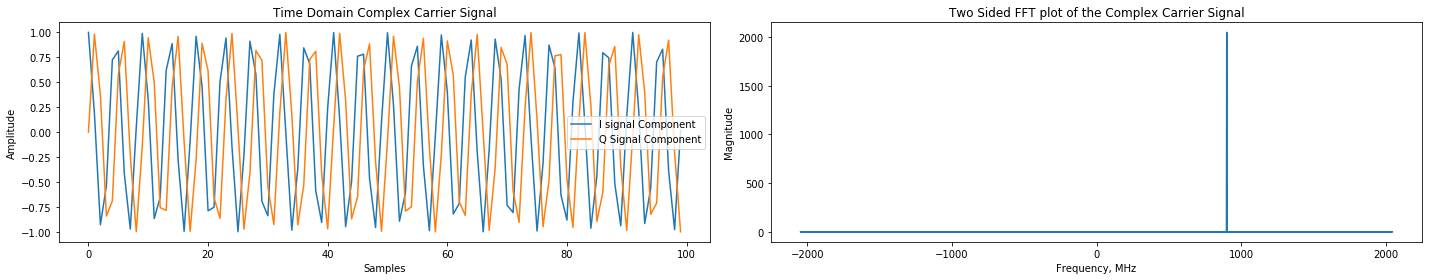

In [9]:
fig, axs = plt.subplots(1,2, figsize=(20,4))
axs[0].plot(c_complex.real[:100])
axs[0].plot(c_complex.imag[:100])
axs[0].set_title('Time Domain Complex Carrier Signal')
axs[0].set_xlabel('Samples')
axs[0].set_ylabel('Amplitude')
axs[0].legend(('I signal Component', 'Q Signal Component'))

axs[1].plot(freqs[:int(N_fft)]/1e6, np.abs(c_complex_fft_result[:int(N_fft)]))
axs[1].set_title('Two Sided FFT plot of the Complex Carrier Signal')
axs[1].set_ylabel('Magnitude')
axs[1].set_xlabel('Frequency, MHz')
fig.tight_layout()

This modulator creates the following signal, achieved by multiplying $g(t)$ with $e^{j 2 \pi f_{c} t}$:

$v(t) = g(t)e^{j 2 \pi f_{c} t} = [g_{1}(t) + jg_{2}(t)]e^{j 2 \pi f_{c} t}$

$v(t) = [g_{1}(t) \cos (2 \pi f_{c} t) - g_{2}(t) \sin (2 \pi f_{c} t)] + j [g_{1}(t) \sin (2 \pi f_{c} t) + g_{2}(t) \cos(2 \pi f_{c} t)]$

In [10]:
# Find complex modulated signal v(t)
v = g_complex*c_complex

In [11]:
# Find FFT of real modulated signal
v_fft_result = np.fft.fft(v, N_fft)

As we might expect from the exponential carrier, all of the information in the modulated signal is contained in the positive frequencies, and so we see components at $f_{c} - f_{b}$ and $f_{c} + f_{b}$ for each signal.

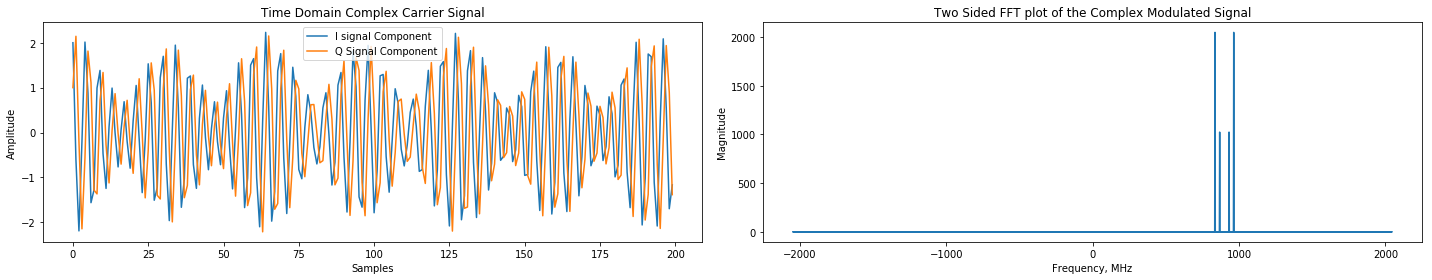

In [12]:
fig, axs = plt.subplots(1,2, figsize=(20,4))
axs[0].plot(v.real[:200])
axs[0].plot(v.imag[:200])
axs[0].set_title('Time Domain Complex Carrier Signal')
axs[0].set_xlabel('Samples')
axs[0].set_ylabel('Amplitude')
axs[0].legend(('I signal Component', 'Q Signal Component'))

axs[1].plot(freqs[:int(N_fft)]/1e6, np.abs(v_fft_result[:int(N_fft)]))
axs[1].set_title('Two Sided FFT plot of the Complex Modulated Signal')
axs[1].set_ylabel('Magnitude')
axs[1].set_xlabel('Frequency, MHz')
fig.tight_layout()

Information about both $g_{1}(t)$ and $g_{2}(t)$ is contained in the real portion of the signal and as a result the imaginary part can be removed using a 'Real' operator. This leaves:

$y(t) = g_{1}(t) \cos (2 \pi f_{c} t) - g_{2}(t) \sin (2 \pi f_{c} t)$

In [13]:
# Find Real modulated signal
y = v.real

In [14]:
# Find FFT of real modulated signal
y_fft_result = np.fft.fft(y, N_fft)

We can observe from the below plots that this is mathematically identical to the combined QAM modulator $y(t)$ found in the QAM example.

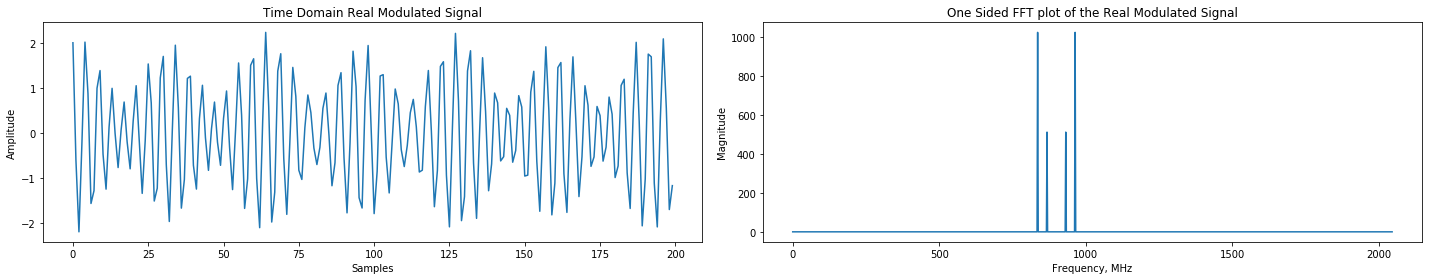

In [15]:
fig, axs = plt.subplots(1,2, figsize=(20,4))
axs[0].plot(y[:200])
axs[0].set_title('Time Domain Real Modulated Signal')
axs[0].set_xlabel('Samples')
axs[0].set_ylabel('Amplitude')

axs[1].plot(freqs[:int(N_fft/2)]/1e6, np.abs(y_fft_result[:int(N_fft/2)]))
axs[1].set_title('One Sided FFT plot of the Real Modulated Signal')
axs[1].set_ylabel('Magnitude')
axs[1].set_xlabel('Frequency, MHz')
fig.tight_layout()

## 4.2 Complex Demodulation <a class="anchor" id="complex_QAM_demod"></a>

QAM Demodulation can also be expressed using a complex notation, shown in [Figure 2](#fig-2).:

<a class="anchor" id="fig-2"></a>
<figure>
<img src='./images/Complex_Demod.png' height='30%' width='30%'/>
    <figcaption><b>Figure 2: Complex Demodulation</b></figcaption>
</figure>

Where:

$x(t) = y(t)e^{j 2 \pi f_{c} t} = [g_{1}(t) \cos (2 \pi f_{c} t) - g_{2}(t) \sin (2 \pi f_{c} t)]e^{j 2 \pi f_{c} t}$

$x(t) = 0.5[g_{1}(t) + jg_{2}] + 0.5(g_{1}(t) \cos(4 \pi f_{c} t) - j0.5(g_{2}(t) \cos(4 \pi f_{c} t) - j0.5(g_{1}(t) \sin(4 \pi f_{c} t) - 0.5(g_{2}(t) \sin(4 \pi f_{c} t)$

In [16]:
# Define local exponential carrier at the receiver
complex_demod_carrier = np.exp(-1j*2*np.pi*fc*t)

In [17]:
# Find FFT of real modulated signal
complex_demod_carrier_fft_result = np.fft.fft(complex_demod_carrier, N_fft)

We aim to demodulate the received signal, or 'shift' the spectrum to the left. Therefore our local oscillator should be the negaitive of the transmitter oscillator. We can confirm this in the frequency domain, where we can see a frequency component at -900 MHz. 

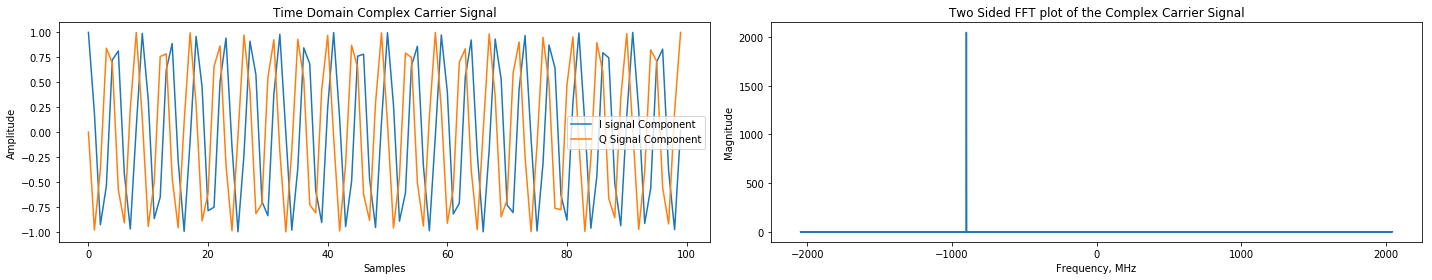

In [18]:
fig, axs = plt.subplots(1,2, figsize=(20,4))
axs[0].plot(complex_demod_carrier.real[:100])
axs[0].plot(complex_demod_carrier.imag[:100])
axs[0].set_title('Time Domain Complex Carrier Signal')
axs[0].set_xlabel('Samples')
axs[0].set_ylabel('Amplitude')
axs[0].legend(('I signal Component', 'Q Signal Component'))

axs[1].plot(freqs[:int(N_fft)]/1e6, np.abs(complex_demod_carrier_fft_result[:int(N_fft)]))
axs[1].set_title('Two Sided FFT plot of the Complex Carrier Signal')
axs[1].set_ylabel('Magnitude')
axs[1].set_xlabel('Frequency, MHz')
fig.tight_layout()

We multiply the received signal $y_{t}$ with the local oscillator, giving:

$x(t) = y(t)e^{j 2 \pi f_{c} t} = [g_{1}(t) \cos (2 \pi f_{c} t) - g_{2}(t) \sin (2 \pi f_{c} t)]e^{j 2 \pi f_{c} t}$

$x(t) = 0.5[g_{1}(t) + jg_{2}] + 0.5(g_{1}(t) \cos(4 \pi f_{c} t) - j0.5(g_{2}(t) \cos(4 \pi f_{c} t) - j0.5(g_{1}(t) \sin(4 \pi f_{c} t) - 0.5(g_{2}(t) \sin(4 \pi f_{c} t)$

In [19]:
# Demodulate by multiplying y(t) by the exponential
x = y*complex_demod_carrier

In [20]:
# Find FFT of demodulated signals
x_fft_result = np.fft.fft(x, N_fft)

We can see in the frequency domain that the desired signal can be seen around 0 Hz, successfully demodulated. However a copy of the signal can also be seen around $-2 f_{c}$.

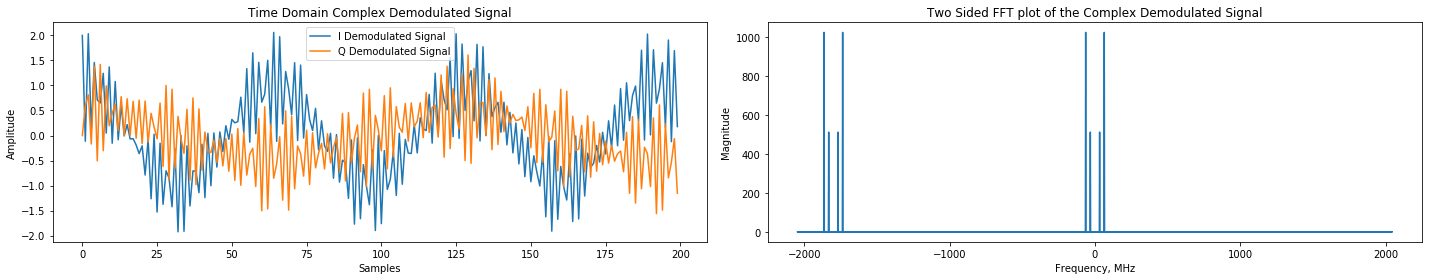

In [21]:
fig, axs = plt.subplots(1,2, figsize=(20,4))
axs[0].plot(x.real[:200])
axs[0].plot(x.imag[:200])
axs[0].set_title('Time Domain Complex Demodulated Signal')
axs[0].set_xlabel('Samples')
axs[0].set_ylabel('Amplitude')
axs[0].legend(('I Demodulated Signal', 'Q Demodulated Signal'))

axs[1].plot(freqs[:int(N_fft)]/1e6, np.abs(x_fft_result[:int(N_fft)]))
axs[1].set_title('Two Sided FFT plot of the Complex Demodulated Signal')
axs[1].set_ylabel('Magnitude')
axs[1].set_xlabel('Frequency, MHz')
fig.tight_layout()

As before, we can apply a low pass filter to this signal to remove the unwanted components. The lowpass filter is symmetrical and so will remove the large negative frequency. This leaves:

$z(t) = 0.5[g_{1}(t) + jg_{2}]$ 

In [22]:
# Define lowpass filter
f_cutoff = 0.1 # Cutoff frequency as a fraction of the sampling rate
b = 0.08  # Transition band, as a fraction of the sampling rate (in (0, 0.5)).

N = int(np.ceil((4 / b)))
if not N % 2: N += 1  # N is odd.
n = np.arange(N)

h = np.sinc(2 * f_cutoff * (n - (N - 1) / 2)) # Compute sinc filter.
w = np.blackman(N) # Compute Blackman window.
h = h * w # Multiply sinc filter by window.
h = h / np.sum(h) # Normalize to get unity gain.

In [23]:
# Apply filter to demodulated signal
z = np.convolve(x, h)

In [24]:
# Find FFT of filtered signal
z_fft_result = np.fft.fft(z, N_fft)

We see that the reconstructed signal matches the input signal in both time and frequency domains.

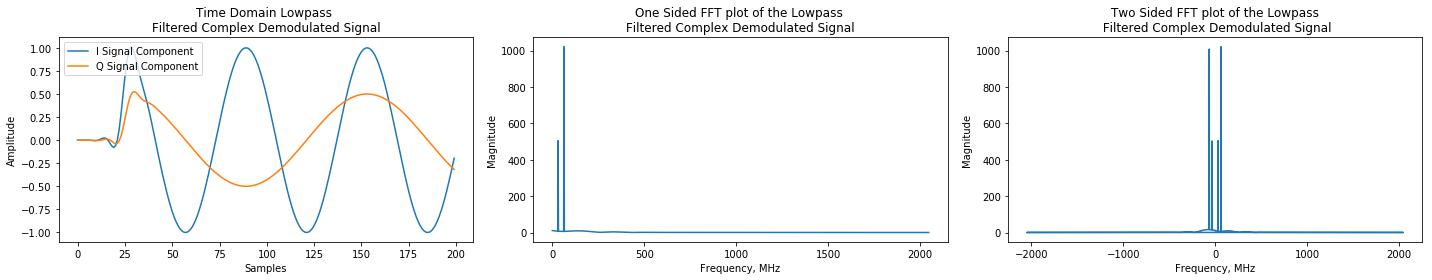

In [25]:
fig, axs = plt.subplots(1,3, figsize=(20,4))
axs[0].plot(z.real[:200])
axs[0].plot(z.imag[:200])
axs[0].set_title('Time Domain Lowpass \nFiltered Complex Demodulated Signal')
axs[0].set_xlabel('Samples')
axs[0].set_ylabel('Amplitude')
axs[0].legend(('I Signal Component', 'Q Signal Component'))

axs[1].plot(freqs[:int(N_fft/2)]/1e6, np.abs(z_fft_result[:int(N_fft/2)]))
axs[1].set_title('One Sided FFT plot of the Lowpass \nFiltered Complex Demodulated Signal')
axs[1].set_ylabel('Magnitude')
axs[1].set_xlabel('Frequency, MHz')
fig.tight_layout()

axs[2].plot(freqs[:int(N_fft)]/1e6, np.abs(z_fft_result[:int(N_fft)]))
axs[2].set_title('Two Sided FFT plot of the Lowpass\n Filtered Complex Demodulated Signal')
axs[2].set_ylabel('Magnitude')
axs[2].set_xlabel('Frequency, MHz')
fig.tight_layout()

These two QAM architectures are mathematically identical, however the complex representation is an easier architecture to work with, and working with complex exponentials is much easier and more tractable than working with the cosine and standard QAM form.

## Conclusion <a class="anchor" id="conclusion"></a>
Through this notebook we have explored a complex QAM architecture, and seen how we can exploit properties of a complex exponential mixer to modulate and demodulate a complex signal with simpler architecture than a standard QAM form.

[⬅️ Previous Notebook](03_QAM_modulation.ipynb) | | [Next Notebook ➡️](05_conclusion.ipynb)

----
----